In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [3]:
data = pd.read_csv('snp_new.csv', index_col=0, parse_dates=True)
data = data[data.columns[data.columns.str.contains("Adj Close")]]
data.sort_values(by='Date', inplace=True)

In [27]:
data.dropna(axis=1, inplace=True)
data.drop("GOOG Adj Close", axis=1, inplace=True)
data.columns = data.columns.str.replace("Adj Close", "").str.strip()

In [28]:
data

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WY,WYNN,XEL,XOM,XRAY,XRX,YUM,ZBH,ZBRA,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2008-01-02,23.579500,12.557316,34.522026,5.931609,17.949671,15.250000,18.861946,27.288836,41.709999,20.819237,...,16.028332,67.573509,12.966664,54.432281,39.585438,26.983900,20.265816,58.752533,34.259998,36.136299
2008-01-03,23.345652,11.991672,34.852650,5.934352,18.058455,15.020000,18.747040,26.819645,41.790001,20.503901,...,16.180723,65.287712,13.042689,54.618557,39.956650,26.779217,19.982269,58.814575,33.930000,35.410217
2008-01-04,22.585655,11.699420,32.758728,5.481351,17.647484,14.480000,18.855188,26.418558,40.360001,19.969194,...,15.378414,64.991165,12.896475,53.599876,39.187057,25.772869,19.698709,58.938656,32.750000,33.830406
2008-01-07,22.955917,11.529726,34.237305,5.407983,17.881172,14.740000,19.433105,25.707203,40.240002,19.715557,...,15.268600,64.385735,13.095334,53.099236,40.128689,25.755810,20.158815,60.853062,32.820000,34.532543
2008-01-08,22.923426,10.379583,32.474030,5.213449,18.392872,14.570000,19.943445,25.707203,39.220001,19.064316,...,14.948117,64.558723,12.960813,52.418198,40.346001,25.278210,19.645216,59.603382,32.520000,33.319759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-18,131.382507,17.870001,213.427826,166.546555,140.201691,298.380005,115.267708,317.678802,442.559998,158.080872,...,38.615505,93.150002,64.651657,75.233109,54.527687,20.851498,124.000565,116.744392,420.309998,69.178497
2022-02-22,129.830414,17.430000,201.683441,163.579971,139.270309,296.640015,115.978325,317.609528,438.399994,158.593475,...,37.925587,88.550003,64.592888,74.357849,54.824627,19.991446,122.295303,118.625504,409.760010,69.344788
2022-02-23,125.363091,16.639999,191.967987,159.349121,138.190308,290.679993,115.721718,309.746185,429.450012,154.265869,...,36.742878,87.190002,63.603523,74.659317,54.854317,19.160061,119.850777,118.249275,399.290009,68.190514


In [29]:
def normalising(data, formation_period, trading_period):
    '''
    This is simply normalising the data for the period given. As output you receive two dataframes of normalised data:
    1. formation period dataframe
    2. trading period dataframe
    '''
    normalised_data = (data+1).cumprod()
    formation_data = normalised_data.iloc[:formation_period]
    trading_data = normalised_data.iloc[formation_period:]
    return formation_data, trading_data

def sq_differences(normalized_v):
    """
    Creates a symmetrical matrix in which each value represents the squared difference between column i and index i.
    This function was created for the pairs_strategy() function
    """
    #creating a dataframe of n stocks * n stocks
    sqdiff_df = pd.DataFrame(columns=normalized_v.columns, index=normalized_v.columns)
    # filling up the empty dataframe with the squared differences.
    for c in sqdiff_df.columns:
        for i in sqdiff_df.index:
            ticker_c_normalisedP = normalized_v[c]
            ticker_i_normalisedP = normalized_v[i]
            sqdiff_ic = ((ticker_c_normalisedP - ticker_i_normalisedP)**2).sum()
            sqdiff_df.loc[i,c] = sqdiff_ic
    #Removing the zeros from the diagonal.
    sqdiff_df_nozero = sqdiff_df.query("@sqdiff_df>0")
    
    return sqdiff_df_nozero

def find_top_pairs(n_pairs, sqdiff_df_nozero):
    '''
    Provide the matrix of squared differences and the number of pairs you want. The output of this will be the top n_pairs of
    tickers in terms of the ones that have the lowest differences.
    '''
    pairs_list = []
    for i in range(1,n_pairs+1):
        minv = sqdiff_df_nozero.min().min()
        pair_tickers = sqdiff_df_nozero[sqdiff_df_nozero == minv].sum()[sqdiff_df_nozero[sqdiff_df_nozero == minv].sum() == minv].index
        pairs_list.append([pair_tickers[0], pair_tickers[1]])
        sqdiff_df_nozero = sqdiff_df_nozero.query("@sqdiff_df_nozero != @minv")
    
    return pairs_list

def signals(trading_data, current_stats, pairs_list):
    '''
    
    '''
    pairs = {}
    open_close = {}
    for n in np.linspace(1,current_stats.shape[0],current_stats.shape[0]):
        dif = trading_data[current_stats.loc[n, "pair"][0]] - trading_data[current_stats.loc[n, "pair"][1]]
        results_pair = pd.DataFrame(index = trading_data.index, columns = current_stats.loc[n, "pair"])
        length_pos = pd.DataFrame(index = trading_data.index, columns = ["open","close"])#NEW
        open_pos = []
        pos = "neutral" # this will change depending on whether we are long/short the first ticker in a pair
        
        for date in dif.index[:]:
            # if there is a signal to open a position, add 1 to the open_pos variable. 1 means there is an open position, nothing means
            # there is no open position
            if abs(dif.loc[date]) > current_stats.loc[n, "signal_open"] and 1 not in open_pos:
                open_pos.append(1)
                length_pos.loc[date,"open"] = 1 
            # when there is an active position and a signal to close it, remove the 1 from open_pos
                
            elif pos == "short" and dif.loc[date] < current_stats.loc[n, "signal_close"] and 1 in open_pos:
                open_pos.remove(1)
                length_pos.loc[date,"close"] = 1 
            elif pos == "long" and dif.loc[date] > current_stats.loc[n, "signal_close"] and 1 in open_pos:
                open_pos.remove(1)
                length_pos.loc[date,"close"] = 1 
                
            # adding a column that indicates whether there is an active position. len(open_pos) could only be 1 or 0.    
            len_open_pos = len(open_pos)
            results_pair.loc[date,:] = (-np.sign(dif.loc[date])*len_open_pos, len_open_pos*np.sign(dif.loc[date]))
            
            if -np.sign(dif.loc[date])*len_open_pos == -1:
                pos = "short" #when the above is negative, that means that we are short the first ticker in the pair
             
            elif -np.sign(dif.loc[date])*len_open_pos == 1:
                pos = "long" #when the above is positive, that means that we are long the first ticker in the pair
            else:
                pos = "neutral"
            
        pairs[n] = results_pair.shift(1) #shifting one assuming we enter the trade the next day after the signal
        length_pos["open"] = length_pos["open"].shift(1)
        open_close[n] = length_pos.replace(np.nan, 0) 
        
    return pairs, open_close

def rets_per_pair(data_rets, trading_data, signals, entries):
    """
    
    """
    rets_trading_data = data_rets.loc[trading_data.index, :]
    rets_pair_result = {}
    
    for n in np.linspace(1,len(signals),len(signals)):
        signals_per_pair = signals[n]
        entries_per_pair = entries[n]
        ticker1 = signals[n].columns[0]
        ticker2 = signals[n].columns[1]
        rets_trading_tickers = rets_trading_data[[ticker1,ticker2]]
        rets_strategy_pairs = (rets_trading_tickers*signals_per_pair)+1
        wealth_index = pd.DataFrame(1, index = trading_data.index, columns = [ticker1,ticker2])
    
        for date in rets_trading_data.index[:]:
            if entries_per_pair.loc[date, "open"] == 1:
                amount_per_ticker = (wealth_index.shift(1).loc[date].sum())/2
                wealth_index_day = amount_per_ticker * rets_strategy_pairs.loc[date]
                wealth_index.loc[date] = wealth_index_day
            else:
                if date == rets_trading_data.index[0]:
                    amount_per_ticker = [1, 1]
                    signals_per_pair.loc[date] = [0, 0]
                else:
                    amount_per_ticker = wealth_index.shift(1).loc[date]
                
                wealth_index.loc[date] = amount_per_ticker * rets_strategy_pairs.loc[date]
                    
                #print(amount_per_ticker, (rets_trading_tickers.loc[date]+1), signals_per_pair.loc[date])
                
        rets_pair_result[n] = wealth_index
        #print(n, wealth_index)
        
    return rets_pair_result

In [30]:
def another(data, trading_data, signals, entries):
    '''
    
    '''
    return rets_per_pair(data_rets=data, trading_data=trading_data, signals=signals, entries=entries)

In [31]:
formation_period=252
trading_period=126
period = formation_period+trading_period
start_period=600
min(start_period+period, data.iloc[:900].shape[0])-formation_period-start_period

48

In [33]:
def backtest(data, formation_period=252, trading_period=126, n_pairs = 10, spread_std_open = 2, spread_std_close = 0, comm = .0003):
    '''
    
    '''
    data_rets = data.pct_change()
    start_period = 0
    period = formation_period + trading_period
    n_periods = data.shape[0]
    
    start_df = data_rets.iloc[start_period:min(formation_period, n_periods)] #this is only used for the indexes of the below df
    index_1 = f"{start_df.index[0].to_period('d')} to {start_df.index[-1].to_period('d')}"
    indexes = [np.repeat(index_1,n_pairs), np.linspace(1, n_pairs, n_pairs)]
    columns = ["pair", "mean", "std", "signal_open", "signal_close"]
    historical_stats_df = pd.DataFrame(index = indexes, columns=columns)
    results_rets_per_pair = pd.DataFrame(index = data.iloc[formation_period:].index, 
                                         columns = np.linspace(1, n_pairs, n_pairs))
    commission_df = pd.DataFrame(0, index = data.iloc[formation_period:].index, 
                                         columns = np.linspace(1, n_pairs, n_pairs)) 
    
    while start_period+formation_period < n_periods:
        datarets_period = data_rets.iloc[start_period:min(start_period+period, n_periods)]
        # the below method is simply normalising the datarets_period df.
        formation_data, trading_data = normalising(datarets_period, formation_period=formation_period, 
                                                   trading_period=min(start_period+period, n_periods)-formation_period-start_period)

        def pairs_generation(formation_data=formation_data, n_pairs=n_pairs):
            '''
            Generates the pairs to be traded in the trading period
            '''
            # the below method is capturing in a matrix all the squared differences among every possible pair during
            # the formation period
            sqdiff_df = sq_differences(formation_data)
            pairs_list = find_top_pairs(n_pairs, sqdiff_df) # the first pair is the most cointegrated.
            return pairs_list
        pairs_list = pairs_generation()
        
        def historical_stats(df = historical_stats_df, formation_data = formation_data, spread_std_open = spread_std_open, spread_std_close = spread_std_close):
            '''
            Input: empty dataframe
            Output: historical stats including std and mean of squared deviations for every pair during the formation period.
            The output of this function will be used to create the dataframe with the signals (1, 0,-1)
            '''
            index_1 = f"{formation_data.index[0].to_period('d')} to {formation_data.index[-1].to_period('d')}"
            pair_n = 1
            
            for pairs in pairs_list:
                dif = (formation_data[pairs[0]] - formation_data[pairs[1]])
                mean = dif.mean()
                std = dif.std()
                signal_open = mean + std*spread_std_open
                signal_close = mean + std*spread_std_close
                df.loc[(index_1,pair_n),:] = (pairs, mean, std, signal_open, signal_close)
                pair_n += 1
                
            
            return df, index_1
        
        historical_stats_df,index_1 = historical_stats(df = historical_stats_df)
        historical_stats_current = historical_stats_df.loc[str(index_1)]
        signals_pairs, entry_exit = signals(trading_data=trading_data, current_stats=historical_stats_current, pairs_list=pairs_list)
        
        for n in np.linspace(1,len(entry_exit),len(entry_exit)):
            open_close = entry_exit[n]
            cost = (open_close * comm * 2).sum(axis=1)
            commission_df.loc[cost.index, n] = cost
        
        
        another(data=data_rets, trading_data=trading_data, signals=signals_pairs, entries=entry_exit) #using this code the below line works
        rets_per_pair_v = rets_per_pair(data_rets=data_rets, trading_data=trading_data, 
                                        signals=signals_pairs, entries=entry_exit)
        
        for n in np.linspace(1,len(rets_per_pair_v),len(rets_per_pair_v)):
            wealth_index_pair = rets_per_pair_v[n].sum(axis=1)
            ret_wealth_index = wealth_index_pair.pct_change()
            ret_wealth_index[0] = 0
            results_rets_per_pair.loc[wealth_index_pair.index, n] = ret_wealth_index
        # when this formation period and trading period end, let's compute the following
        start_period = start_period + trading_period
        #end = end + formation_period + trading_period
    return pairs_list, historical_stats_df, signals_pairs, entry_exit, rets_per_pair_v, results_rets_per_pair, commission_df

In [34]:
pairs, stats, signals_v, entries, rets_temp, final_results, cost_per_pair = backtest(data)

/Users/juansarmiento/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)
/Users/juansarmiento/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/Users/juansarmiento/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-

In [38]:
(final_results+1).prod()

1.0     1.232597
2.0     1.016795
3.0     1.075551
4.0     1.017766
5.0      1.19277
6.0     1.043681
7.0     1.113609
8.0      1.09614
9.0     0.968079
10.0    1.096237
dtype: object

In [50]:
final_results_after_cost = final_results - cost_per_pair

In [4]:
(final_results_after_cost+1).prod()

1.0     1.184913
2.0     0.984380
3.0     1.037559
4.0     0.971910
5.0     1.148659
6.0     0.979951
7.0     1.053879
8.0     1.054923
9.0     0.937844
10.0    1.046891
dtype: float64

Text(0.5, 1.0, 'Cumulative Returns (Incl. Trading Costs)')

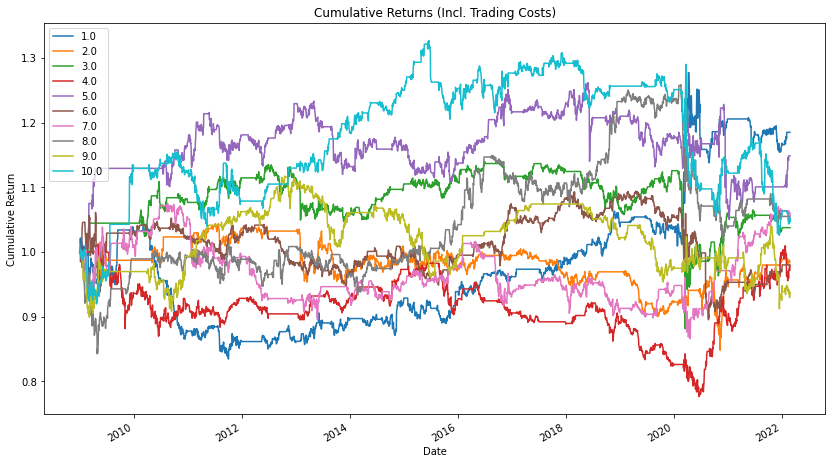

In [15]:
(final_results_after_cost+1).cumprod().plot(figsize=(14,8))
plt.ylabel("Cumulative Return")
plt.title("Cumulative Returns (Incl. Trading Costs)")

Text(0.5, 1.0, 'Cumulative Returns (Excl. Trading Costs)')

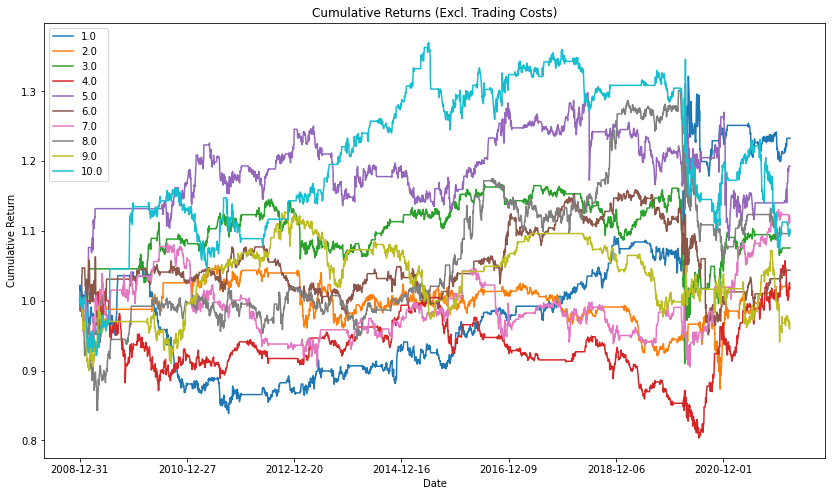

In [14]:
(final_results_df+1).cumprod().plot(figsize=(14,8))
plt.ylabel("Cumulative Return")
plt.title("Cumulative Returns (Excl. Trading Costs)")

In [21]:
value_portfolio = pd.concat([(final_results_after_cost+1).prod(), (final_results_df+1).prod()], axis=1)
value_portfolio.columns = ["Incl. Trading Costs","Excl. Trading Costs"]
value_portfolio

,Incl. Trading Costs,Excl. Trading Costs
1.0,1.184913,1.232597
2.0,0.984380,1.016795
3.0,1.037559,1.075551
4.0,0.971910,1.017766
5.0,1.148659,1.192770
6.0,0.979951,1.043681
7.0,1.053879,1.113609
8.0,1.054923,1.096140
9.0,0.937844,0.968079
10.0,1.046891,1.096237


# Alternative Dataset

In [128]:
df_prices2 = pd.read_csv(r"prices_long.csv", index_col="Date", parse_dates=True)
pairs2, stats2, signals_v2, entries2, rets_temp2, final_results2 = backtest(df_prices2.dropna(axis=1))

/Users/juansarmiento/opt/anaconda3/lib/python3.9/site-packages/pandas/core/internals/blocks.py:938: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr_value = np.asarray(value)
/Users/juansarmiento/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).ndim
/Users/juansarmiento/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3162: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-

In [29]:
final_results2 = pd.read_csv("results_alt_dataset.csv", index_col="Date")
alt_value_portfolio = pd.concat([(final_results2+1).prod(), (final_results_df+1).prod()], axis=1)
alt_value_portfolio.columns = ["Alternative Dataset","Excl. Trading Costs"]
alt_value_portfolio

,Alternative Dataset,Excl. Trading Costs
1.0,7.686107,1.232597
2.0,5.200145,1.016795
3.0,4.307863,1.075551
4.0,3.714964,1.017766
5.0,3.522766,1.192770
6.0,3.731919,1.043681
7.0,4.794577,1.113609
8.0,3.970111,1.096140
9.0,3.739457,0.968079
10.0,4.422640,1.096237


In [30]:
final_results2

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Date,,,,,,,,,,
1996-01-02,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.000000
1996-01-03,0.000000,0.0,0.0,0.000000,0.0,0.0,0.007167,0.000000,0.00000,0.000000
1996-01-04,0.000000,0.0,0.0,0.000000,0.0,0.0,0.002821,0.000000,0.00000,0.000000
1996-01-05,0.004854,0.0,0.0,0.000000,0.0,0.0,-0.007211,0.000000,0.00000,0.000000
1996-01-08,0.000092,0.0,0.0,0.000000,0.0,0.0,0.004298,0.000000,0.00813,0.000000
...,...,...,...,...,...,...,...,...,...,...
2022-04-20,0.000000,0.0,0.0,0.002437,0.0,0.0,0.000000,-0.005089,0.00000,-0.003734
2022-04-21,0.000000,0.0,0.0,0.000889,0.0,0.0,0.000000,-0.000605,0.00000,0.002747
2022-04-22,0.000000,0.0,0.0,-0.001543,0.0,0.0,0.000000,0.003113,0.00000,0.000409


Text(0.5, 1.0, 'Cumulative Returns - Alternative dataset')

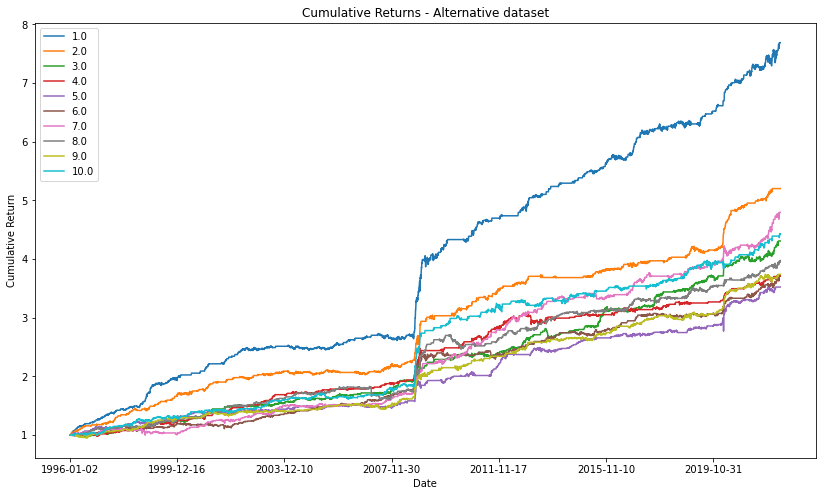

In [32]:
(final_results2+1).cumprod().plot(figsize=(14,8))
plt.ylabel("Cumulative Return")
plt.title("Cumulative Returns - Alternative dataset")

# Results

In [34]:
def drawdown(return_series: pd.Series):
    """Takes a time series of asset returns.
       returns a DataFrame with columns for
       the wealth index, 
       the previous peaks, and 
       the percentage drawdown
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({"Wealth": wealth_index, 
                         "Previous Peak": previous_peaks, 
                         "Drawdown": drawdowns})

def skewness(r):
    """
    Alternative to scipy.stats.skew()
    Computes the skewness of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**3).mean()
    return exp/sigma_r**3

def kurtosis(r):
    """
    Alternative to scipy.stats.kurtosis()
    Computes the kurtosis of the supplied Series or DataFrame
    Returns a float or a Series
    """
    demeaned_r = r - r.mean()
    # use the population standard deviation, so set dof=0
    sigma_r = r.std(ddof=0)
    exp = (demeaned_r**4).mean()
    return exp/sigma_r**4

def annualize_rets(r, periods_per_year):
    """
    Annualizes a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    compounded_growth = (1+r).prod()
    n_periods = r.shape[0]
    return compounded_growth**(periods_per_year/n_periods)-1

def annualize_vol(r, periods_per_year):
    """
    Annualizes the vol of a set of returns
    We should infer the periods per year
    but that is currently left as an exercise
    to the reader :-)
    """
    return r.std()*(periods_per_year**0.5)

def sharpe_ratio(r, riskfree_rate, periods_per_year):
    """
    Computes the annualized sharpe ratio of a set of returns
    """
    # convert the annual riskfree rate to per period
    rf_per_period = (1+riskfree_rate)**(1/periods_per_year)-1
    excess_ret = r - rf_per_period
    ann_ex_ret = annualize_rets(excess_ret, periods_per_year)
    ann_vol = annualize_vol(r, periods_per_year)
    return ann_ex_ret/ann_vol

from scipy.stats import norm
def var_gaussian(r, level=5, modified=False):
    """
    Returns the Parametric Gauusian VaR of a Series or DataFrame
    If "modified" is True, then the modified VaR is returned,
    using the Cornish-Fisher modification
    """
    # compute the Z score assuming it was Gaussian
    z = norm.ppf(level/100)
    if modified:
        # modify the Z score based on observed skewness and kurtosis
        s = skewness(r)
        k = kurtosis(r)
        z = (z +
                (z**2 - 1)*s/6 +
                (z**3 -3*z)*(k-3)/24 -
                (2*z**3 - 5*z)*(s**2)/36
            )
    return -(r.mean() + z*r.std(ddof=0))

def cvar_historic(r, level=5):
    """
    Computes the Conditional VaR of Series or DataFrame
    """
    if isinstance(r, pd.Series):
        is_beyond = r <= -var_historic(r, level=level)
        return -r[is_beyond].mean()
    elif isinstance(r, pd.DataFrame):
        return r.aggregate(cvar_historic, level=level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")

def var_historic(r, level=5):
    """
    Returns the historic Value at Risk at a specified level
    i.e. returns the number such that "level" percent of the returns
    fall below that number, and the (100-level) percent are above
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected r to be a Series or DataFrame")


def summary_stats(r, periods_per_year,riskfree_rate=0.03):
    """
    Return a DataFrame that contains aggregated summary stats for the returns in the columns of r
    """
    ann_r = r.aggregate(annualize_rets, periods_per_year=periods_per_year)
    ann_vol = r.aggregate(annualize_vol, periods_per_year=periods_per_year)
    ann_sr = r.aggregate(sharpe_ratio, riskfree_rate=riskfree_rate, periods_per_year=periods_per_year)
    dd = r.aggregate(lambda r: drawdown(r).Drawdown.min())
    skew = r.aggregate(skewness)
    kurt = r.aggregate(kurtosis)
    cf_var5 = r.aggregate(var_gaussian, modified=True)
    hist_cvar5 = r.aggregate(cvar_historic)
    return pd.DataFrame({
       "Annualized Return": ann_r,
        "Annualized Vol": ann_vol,
        "Skewness": skew,
        "Kurtosis": kurt,
        "Cornish-Fisher VaR (5%)": cf_var5,
        "Historic CVaR (5%)": hist_cvar5,
        "Sharpe Ratio": ann_sr,
        "Max Drawdown": dd
    })

<AxesSubplot:xlabel='Date'>

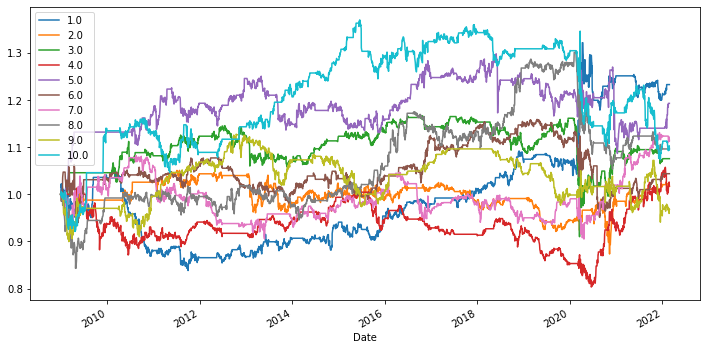

In [152]:
(final_results+1).cumprod().plot(figsize=(12,6))

<AxesSubplot:xlabel='Date'>

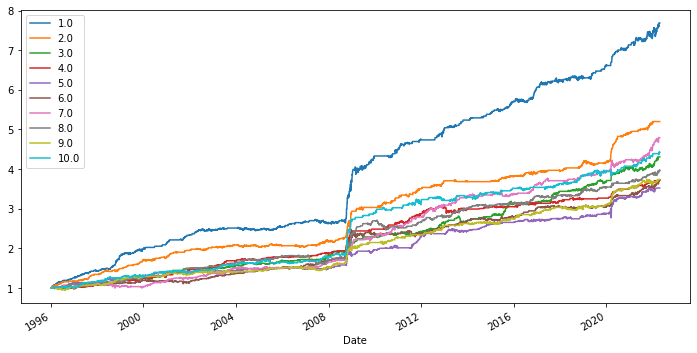

In [153]:
(final_results2+1).cumprod().plot(figsize=(12,6))

In [25]:
summary_stats(final_results_df, 252)

,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
1.0,0.060250,1.062763,22.123567,0.003480,0.008481,-0.225002,-0.199001
2.0,0.052845,-0.100141,24.955460,0.004084,0.007828,-0.527934,-0.168706
3.0,0.064313,-0.926107,151.412091,-0.004498,0.008486,-0.369038,-0.220187
4.0,0.058868,-0.495861,19.314487,0.005371,0.008967,-0.472715,-0.207612
5.0,0.068460,-3.028323,90.188753,0.002412,0.009545,-0.233989,-0.162722
6.0,0.062220,-1.246812,44.537220,0.004415,0.009110,-0.417327,-0.179270
7.0,0.064910,0.450394,24.183889,0.004397,0.009819,-0.325793,-0.163587
8.0,0.070698,-0.595535,54.582542,0.003376,0.010154,-0.315771,-0.196140
9.0,0.057666,-0.462344,15.341070,0.005536,0.009263,-0.546659,-0.165419
10.0,0.073441,0.150138,39.903803,0.003926,0.010619,-0.303888,-0.216221


In [57]:
summary_stats(final_results_after_cost, 252)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
1.0,0.012993,0.060063,1.010664,21.888888,0.003563,0.008498,-0.274937,-0.200444
2.0,-0.001197,0.052841,-0.118095,24.974342,0.004109,0.007846,-0.573265,-0.187452
3.0,0.002809,0.064269,-0.928741,151.821241,-0.004515,0.008497,-0.410807,-0.226702
4.0,-0.002165,0.058739,-0.521846,19.267081,0.005403,0.008983,-0.531714,-0.233773
5.0,0.010601,0.068328,-3.084929,90.465013,0.002436,0.009560,-0.275676,-0.167705
6.0,-0.001540,0.062225,-1.279043,45.197010,0.004412,0.009135,-0.492164,-0.181752
7.0,0.004001,0.064827,0.440660,24.309206,0.004410,0.009834,-0.389423,-0.194579
8.0,0.004076,0.070619,-0.603737,54.767578,0.003376,0.010171,-0.356442,-0.196625
9.0,-0.004871,0.057571,-0.486313,15.289647,0.005563,0.009274,-0.588124,-0.183709
10.0,0.003493,0.073292,0.128135,39.909891,0.003961,0.010622,-0.351176,-0.226944


In [35]:
summary_stats(final_results2, 252)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
1.0,0.080650,0.048139,2.195574,48.100628,-0.000252,0.006086,1.021643,-0.047416
2.0,0.064710,0.044456,1.425260,23.435447,0.001957,0.005959,0.758129,-0.052536
3.0,0.057115,0.050084,0.650905,19.872796,0.003281,0.006850,0.525683,-0.076430
4.0,0.051179,0.050155,2.236970,76.600081,-0.002005,0.006627,0.410009,-0.069210
5.0,0.049057,0.054237,1.111159,32.880980,0.002205,0.007537,0.341167,-0.077298
6.0,0.051361,0.048545,0.756542,17.056073,0.003268,0.006956,0.427250,-0.078761
7.0,0.061427,0.053809,0.495030,13.993529,0.004088,0.007932,0.567104,-0.105013
8.0,0.053838,0.052722,1.263845,59.313492,0.000182,0.007123,0.439016,-0.123443
9.0,0.051441,0.047771,0.964097,18.768180,0.002911,0.006744,0.435809,-0.063065
10.0,0.058173,0.054534,2.717722,45.035406,-0.000624,0.007272,0.501620,-0.058971


In [156]:
summary_stats(final_results2.loc[:"2009"], 252)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
1.0,0.110454,0.058754,2.110089,39.689242,0.000395,0.007092,1.329620,-0.047416
2.0,0.082547,0.053919,1.284489,19.212849,0.002809,0.007212,0.946287,-0.052536
3.0,0.061190,0.055874,0.709782,19.967293,0.003598,0.007590,0.542025,-0.076430
4.0,0.067272,0.059629,2.444941,70.076629,-0.002204,0.007533,0.606931,-0.069210
5.0,0.049530,0.060534,0.846908,16.212031,0.004086,0.008553,0.313259,-0.064882
6.0,0.063981,0.056648,0.857299,15.089477,0.003827,0.008013,0.582457,-0.078761
7.0,0.061055,0.062442,0.417048,12.412038,0.005000,0.009338,0.482915,-0.105013
8.0,0.073514,0.062705,1.350544,54.604014,0.000442,0.008240,0.673803,-0.123443
9.0,0.056191,0.054030,1.060413,18.082978,0.003241,0.007722,0.470675,-0.063065
10.0,0.079224,0.064584,3.078481,40.288241,-0.000965,0.008244,0.740052,-0.058971


In [159]:
summary_stats(final_results2.loc["2009":], 252)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
1.0,0.056548,0.037425,0.625964,13.400558,0.002725,0.005243,0.688776,-0.046523
2.0,0.043841,0.030915,1.152677,12.794515,0.001959,0.004313,0.434707,-0.027547
3.0,0.055563,0.041838,0.516173,14.425111,0.003109,0.005757,0.593281,-0.064278
4.0,0.033901,0.036039,0.210759,16.095988,0.002861,0.005379,0.105097,-0.062132
5.0,0.051790,0.045960,1.658539,75.630195,-0.001200,0.006049,0.460347,-0.077298
6.0,0.038354,0.041072,-0.023336,12.688588,0.003614,0.006114,0.197490,-0.059657
7.0,0.063822,0.043393,0.567894,11.199536,0.003336,0.006252,0.756817,-0.041009
8.0,0.040459,0.039144,0.452434,9.718681,0.003234,0.005598,0.259452,-0.092047
9.0,0.049684,0.041867,0.716558,13.370109,0.003027,0.005733,0.456521,-0.035235
10.0,0.038366,0.039404,-0.119636,19.298805,0.003197,0.005778,0.206161,-0.044693


In [160]:
summary_stats(final_results2.loc["2018":], 252)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
1.0,0.049385,0.034597,0.425801,8.853797,0.002861,0.004926,0.544071,-0.029638
2.0,0.066637,0.030740,2.050163,17.801496,0.001067,0.003674,1.157258,-0.027547
3.0,0.053602,0.038232,1.300548,15.509905,0.002175,0.005097,0.599427,-0.027011
4.0,0.035002,0.031588,-0.234462,14.240509,0.002812,0.004789,0.153759,-0.023743
5.0,0.059810,0.058106,1.982675,85.573501,-0.002648,0.006740,0.498145,-0.077298
6.0,0.047163,0.041150,-0.125340,16.077091,0.003483,0.005704,0.404992,-0.026043
7.0,0.061373,0.040730,0.188724,14.244109,0.003257,0.005968,0.747912,-0.041009
8.0,0.040978,0.037730,0.138489,7.477733,0.003436,0.005349,0.282506,-0.023326
9.0,0.049645,0.039610,0.664222,8.344699,0.003146,0.005336,0.481566,-0.035235
10.0,0.046533,0.041270,-1.086592,29.409606,0.003450,0.005708,0.388987,-0.038731
